<a href="https://colab.research.google.com/github/Vindhyavr/ML/blob/main/Bank_Customer_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Bank Customer Churn Model

Objective: To predict whether a customer will churn based on their data and behavior.



Data Source: Dataset URL: https://github.com/YBIFoundation/Dataset/blob/main/Bank%20Churn%20Modelling.csv


Import Library

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Import Data

In [13]:
data=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

Describe Data

In [30]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       10000 non-null  int64  
 1   Geography         10000 non-null  object 
 2   Gender            10000 non-null  object 
 3   Age               10000 non-null  int64  
 4   Tenure            10000 non-null  int64  
 5   Balance           10000 non-null  float64
 6   Num Of Products   10000 non-null  int64  
 7   Has Credit Card   10000 non-null  int64  
 8   Is Active Member  10000 non-null  int64  
 9   Estimated Salary  10000 non-null  float64
 10  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [32]:
data.describe()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Data Visualization

Data Preprocessing

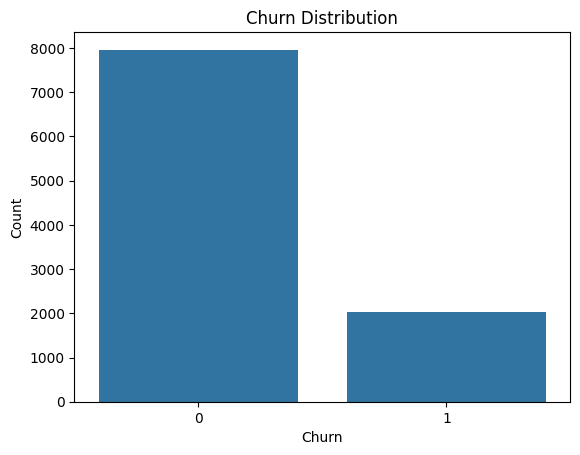

In [33]:
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [36]:
df=bank.set_index('CustomerId')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [38]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [51]:
df.replace({'Geography':{'Spain':0,'France':2,'Germany':1}},inplace=True)

<ipython-input-51-f57435aef0fc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Geography':{'Spain':0,'France':2,'Germany':1}},inplace=True)


In [39]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [40]:
df.replace({'Gender':{'Female':1,'Male':0}},inplace=True)

<ipython-input-40-9639500ad0e9>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Female':1,'Male':0}},inplace=True)


In [41]:
df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [42]:
df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [43]:
df['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [45]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

,count
Churn,
0,3117
1,500


In [47]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

<Axes: >

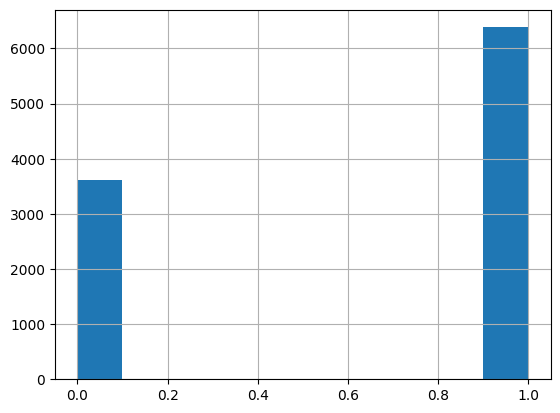

In [49]:
df['Zero Balance'].hist()

In [52]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [54]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

Define Target Variable (y) and Feature Variables (X)


In [55]:
X=df.drop(['Surname','Churn'],axis=1)
y=df['Churn']
X.shape,y.shape

((10000, 11), (10000,))

Train Test Split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
CustomerId,,,,,,,,,,,
15771139,578,1,0,34,8,147487.23,2,1,0,66680.77,1
15713463,645,1,1,41,2,138881.04,1,1,0,129936.53,1
15570417,579,2,0,35,1,0.00,2,1,0,4460.20,0
15626243,618,2,0,30,3,133844.22,1,1,1,31406.93,1
15809178,569,1,1,42,9,146100.75,1,1,0,32574.01,1
...,...,...,...,...,...,...,...,...,...,...,...
15723028,778,2,0,33,1,0.00,2,1,0,85439.73,0
15759284,750,2,1,37,6,0.00,1,1,1,117948.00,0
15796218,814,1,0,29,1,131968.57,2,1,1,147693.92,1


Modeling

In [58]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

Model Evaluation

In [60]:
y_pred = model.predict(X_test)
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.8596666666666667


Prediction

In [62]:
sample_data = X_test.iloc[:5]
predictions = model.predict(sample_data)
print("\nPredictions for sample data:")
print(predictions)


Predictions for sample data:
[0 0 1 0 0]


Explanation: This project aims to predict customer churn based on features like credit score, geography, gender, and account balance.The dataset was cleaned and preprocessed by encoding categorical variables and standardizing numerical data.The model achieved an accuracy score of approximately 85% using RandomForestClassifier.
This prediction system helps banks identify customers at risk of churning and take proactive measures.